In [1]:
#!/usr/bin/env python
__author__      = "Robert Zivkovic"

# Project: Investigate a TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#genres">Q1: Best Genres</a></li>
<li><a href="#genres2">Q2: Most Popular Genres</a></li>  
<li><a href="#functions">Functions</a></li>
<li><a href="#enchance">Add addtional Insights to the DataFrame</a></li>
<li><a href="#movieRating">Q3: Which Year had on average the highest popularity ratings</a></li> 
<li><a href="#releases">Q4: How many movies are released per Year</a></li>     
<li><a href="#popular">Q5: What are the most popular Movies</a></li> 
<li><a href="#profit">Q6: Which movies are the most successfull movies of all time in terms of profit</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

> This is a great place to start digging in to those questions, with data on the plot, budget, and revenues of several thousand films over the past decades.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### set plt style to [xkcd](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xkcd.html)

In [3]:
plt.xkcd()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load data
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [5]:
# check the shape of the dataframe
df.shape

(10866, 21)

In [6]:
# check for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check for duplicated values
df.duplicated().sum()

1

In [8]:
# check for duplicated values
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [10]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

The DataFrame starts in the 60s and goes to 2015

<a id='cleaning'></a>

### Data Cleaning
- There are a couple of columns that have missing values
- There is one duplicated row
- Date related columns need to be reformated to datetime

In [11]:
# change release date from int to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
# check df.shape
df.shape

(10866, 21)

In [13]:
# Remove duplicate row
df.drop_duplicates(inplace=True)

In [14]:
# should show a row less
df.shape

(10865, 21)

In [15]:
# fill null values with 0
df.fillna(0, inplace=True)

In [16]:
# check if there are any null values - should print False
df.isnull().sum().any()

False

In [17]:
# drop columns that will not be used
df.drop(['imdb_id','homepage', 'tagline','keywords','overview', 'budget_adj', 'revenue_adj'],axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.2+ MB


<a id='genres'></a>

### Q1: What are the top rated genres

In [19]:
top_genres = df.groupby('genres').vote_average.mean()
top_genres = top_genres.sort_values(ascending=False)
top_genres[:20]

genres
Drama|Horror|Mystery|Science Fiction|Thriller        8.8
Music|Drama|Fantasy|Romance                          8.4
Thriller|Documentary                                 8.2
Mystery|Documentary|Crime                            8.0
Romance|Comedy|Animation|Drama|Family                8.0
Science Fiction|Adventure|Family                     8.0
Fantasy|Drama|Crime                                  8.0
History|Drama|Thriller|War                           8.0
Science Fiction|Adventure|Drama|Fantasy              7.9
Action|Thriller|Science Fiction|Mystery|Adventure    7.9
Fantasy|Animation|Comedy|Drama                       7.9
Animation|Drama|Fantasy                              7.9
War|Drama|Action|Adventure|History                   7.8
Science Fiction|Drama|Romance                        7.8
Adventure|Family|Animation|Action|Comedy             7.8
Romance|Science Fiction|Drama                        7.8
Animation|Romance                                    7.8
Action|Adventure|Drama|F

In [20]:
top_genres.describe()

count    2040.000000
mean        5.962964
std         0.797865
min         2.600000
25%         5.500000
50%         6.000000
75%         6.500000
max         8.800000
Name: vote_average, dtype: float64

It looks like the movies that make us to have to follow the story are the best rated.

In [21]:
df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

<a id='genres2'></a>

### Q2: What are the most popular genres

In [22]:
top_genres = df.groupby('genres').popularity.mean()
top_genres = top_genres.sort_values(ascending=False)
top_genres[:20]

genres
Adventure|Science Fiction|Thriller                   13.112507
Adventure|Drama|Science Fiction                      12.699699
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Western|Drama|Adventure|Thriller                      9.110700
Adventure|Family|Animation|Action|Comedy              8.691294
Science Fiction|Action|Thriller|Adventure             8.654359
Action|Animation|Horror                               8.411577
History|Drama|Thriller|War                            8.110711
Drama|Adventure|Science Fiction                       7.667400
War|Drama|Action                                      6.415818
Adventure|Comedy|Fantasy|Family                       6.286692
Science Fiction|Fantasy|Action|Adventure              6.189369
Action|Adventure|Science Fiction|Thriller             6.140116
Adventure|Comedy|Science Fiction|Family               6.095293
Crime|Drama|Mystery|Western                     

In [23]:
top_genres.describe()

count    2040.000000
mean        0.743766
std         1.021029
min         0.000188
25%         0.262504
50%         0.459179
75%         0.821269
max        13.112507
Name: popularity, dtype: float64

In [24]:
# here let's filter for movies with at least 1000 votes
popularMovies = df['vote_count'] >= 1000

In [25]:
top_genres = df[popularMovies].groupby('genres').popularity.mean()
top_genres = top_genres.sort_values(ascending=False)
top_genres[:20]

genres
Adventure|Drama|Science Fiction                      24.949134
Action|Adventure|Science Fiction|Thriller            21.142865
Adventure|Science Fiction|Thriller                   13.112507
Action|Adventure|Science Fiction|Fantasy             11.173104
Science Fiction|Adventure|Thriller                   10.739009
Action|Thriller|Science Fiction|Mystery|Adventure     9.363643
Western|Drama|Adventure|Thriller                      9.110700
Adventure|Family|Animation|Action|Comedy              8.691294
Science Fiction|Action|Thriller|Adventure             8.654359
Drama|Action|Crime|Thriller                           8.466668
History|Drama|Thriller|War                            8.110711
Drama|Adventure|Science Fiction                       7.667400
Family|Animation|Adventure|Comedy                     7.404165
Adventure|Fantasy                                     7.242693
Action|Mystery|Science Fiction|Thriller               7.137273
Fantasy|Action|Horror                           

In [26]:
top_genres.describe()

count    303.000000
mean       3.340846
std        2.426262
min        0.142486
25%        2.102149
50%        2.770820
75%        3.824671
max       24.949134
Name: popularity, dtype: float64

It looks like the movies that entertain us are the most popular ones.

<a id='functions'></a>

### functions

In [27]:
def blockbusterRating(x):
    # create movie classes based on the top_genres to avoid low in votes movies with high  
    if x <= 2.102149:
        return "Terrible"
    if x <= 2.770820:
        return "Poor"
    if x <= 3.824671:
        return "Average"
    if x < 7.6:
        return "Excellent"
    if x >= 7.6:
        return "Blockbuster"

In [28]:
def movierating(x):
    # create movie classes based on the top_genres to avoid low in votes movies with high  
    if x < 2.5:
        return "How about reading a book instead"
    if x <= 5.4:
        return "For couch potatos they like it anyway"
    if x <= 6.0:
        return "Average"
    if x <= 6.6:
        return "I liked that one"
    if x > 6.6:
        return "Excellent. What a great movie"

In [29]:
def centuries(x):
    # knowing that the df starts in the 60s
    if x < 1970:
        return "60s"
    if x < 1980:
        return "70s"
    if x < 1990:
        return "80s"
    if x < 2000:
        return "90s"
    if x < 2010:
        return "2000s"
    if x >= 2010:
        return "2010s"

<a id='enchance'></a>


### Add addtional Insights to the DataFrame
- add decade column
- add blockbuster column
- add profit column


In [30]:
# add decades
df['decade'] = df['release_year'].apply(lambda x: centuries(x))
df['blockbuster'] = df['popularity'].apply(lambda x: blockbusterRating(x))
#df['award_potential'] = df['vote_average'].apply(lambda x: movierating(x))
df['profit'] = df['revenue'] - df['budget']

In [31]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,decade,blockbuster,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,2010s,Blockbuster,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2010s,Blockbuster,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,2010s,Blockbuster,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2010s,Blockbuster,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2010s,Blockbuster,1316249360


<a id='movieRating'></a>

### Q3: Which Year had on average the highest popularity ratings
- popular movies has been defined above and it takes only into account movies with a vote_count of 1k+

In [32]:
# popular movies has been defined above and it takes only into account movies with a vote_count of 1k+
popular = df[popularMovies].groupby('release_year').mean()['popularity']

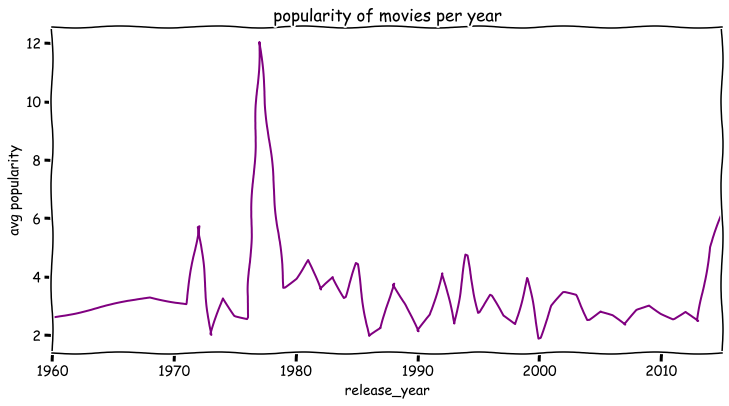

In [33]:
popular.plot(c='purple',figsize=(12,6))
plt.title('popularity of movies per year')
plt.ylabel('avg popularity');

####  Investigate the peak in the 70s

In [34]:
# let's search for the max value
popular.idxmax()

1977

In [35]:
#### hm what was in the year 1977
# display the titles, popularity and vote_averages, vvote_count in the year 1977
year_1977 = df.query('release_year == 1977')
year_1977 = year_1977[['id','popularity', 'original_title',  'vote_average','vote_count']]
mysterious_Movie = year_1977.sort_values('popularity',ascending=False)
mysterious_Movie.iloc[:1,:]

,id,popularity,original_title,vote_average,vote_count
1329,11,12.037933,Star Wars,7.9,4428


It's Star Wars.

### Q3.1: Which Year had on average the highest popularity ratings
- how does the chart change when vote_count is not considered

In [36]:
popular = df.groupby('release_year').mean()['popularity']

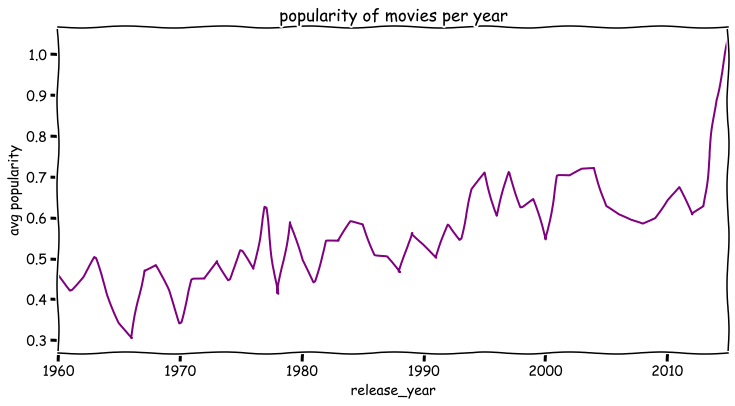

In [37]:
popular.plot(c='purple',figsize=(12,6))
plt.title('popularity of movies per year')
plt.ylabel('avg popularity');

In [38]:
# let's search for the max value
popular.idxmax()

2015

In [39]:
# investigate the movie in 2015
year_2015 = df.query('release_year == 2015')
year_2015 = year_2015[['id','popularity', 'original_title',  'vote_average','vote_count']]
mysterious_Movie = year_2015.sort_values('popularity',ascending=False)
mysterious_Movie.iloc[:1,:]

,id,popularity,original_title,vote_average,vote_count
0,135397,32.985763,Jurassic World,6.5,5562


### Q3.2: How did the vote average change over the years
- first let's take a look at movie's ratings considering a min. vote count of 1k
- second compare the results to movie's ratings not considering a min vote count

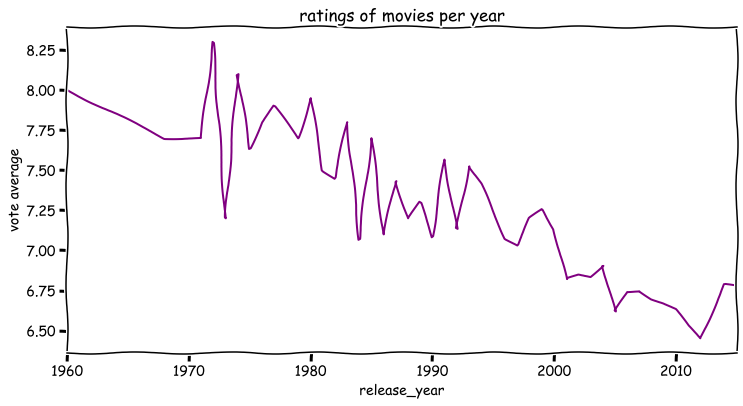

In [40]:
# let's filter the movies with at least 1000 votes
votes = df[popularMovies].groupby('release_year').mean()['vote_average']
votes.plot(c='purple',figsize=(12,6))
plt.title('ratings of movies per year')
plt.ylabel('vote average');

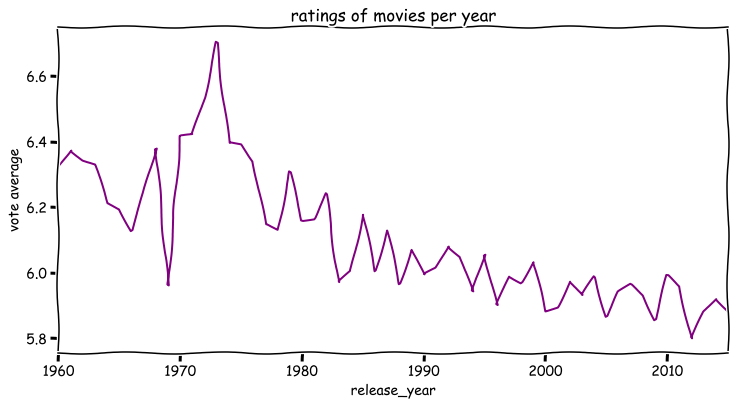

In [41]:
# let's review movies without considering a min. vote count
votes = df.groupby('release_year').mean()['vote_average']
votes.plot(c='purple',figsize=(12,6))
plt.title('ratings of movies per year')
plt.ylabel('vote average');

### Q3.3: How did the vote average change the past decades

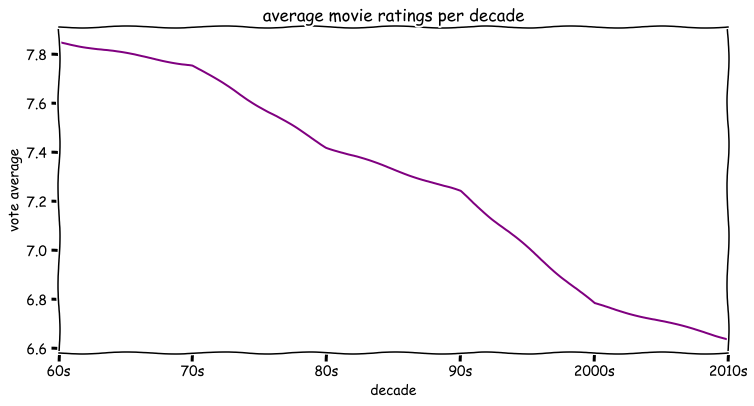

In [42]:
# let's filter the movies with at least 1000 votes
decades = df[popularMovies].groupby('decade').mean()['vote_average']
decades.sort_values(ascending=False).plot(c='purple',figsize=(12,6))
plt.title('average movie ratings per decade')
plt.ylabel('vote average');

**It looks like that the movie ratings are getting worse on average. On the other hand the movies are gaining on popularity.**

### Q3.4: What influence do vote counts have on the average ratings

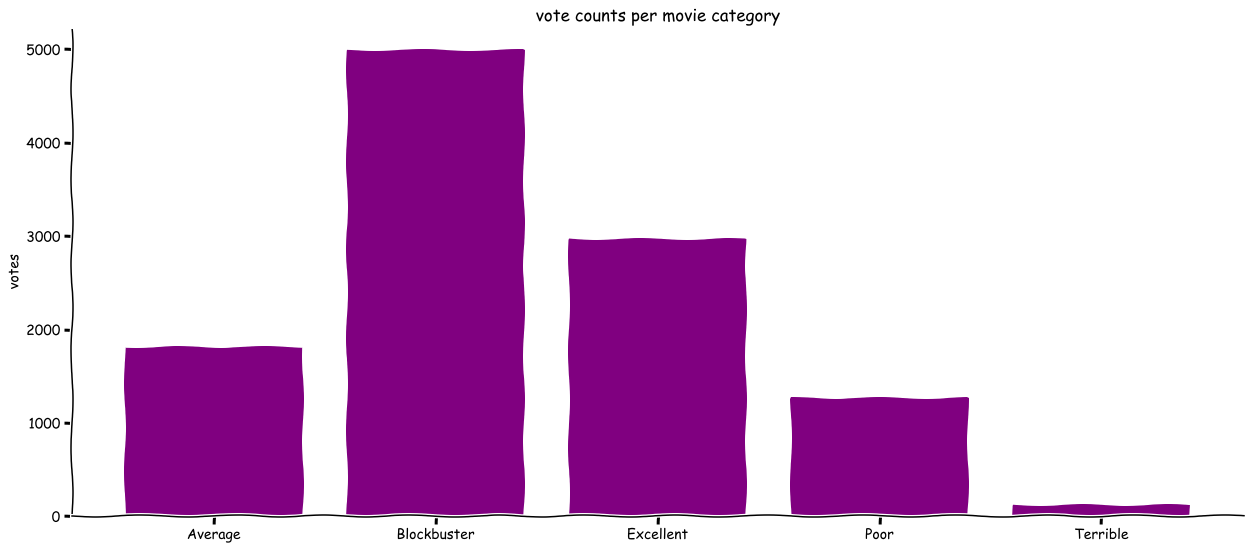

In [43]:

blockbuster = df.groupby('blockbuster').mean()['vote_count']

fig = plt.figure(figsize=(21,9))
ax = fig.add_subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
locations = [1,2,3,4,5]

heights = blockbuster
labels = ['Average', 'Blockbuster', 'Excellent', 'Poor','Terrible']
plt.bar(locations, heights, tick_label=labels, color='purple')
plt.title('vote counts per movie category')
plt.xlabel('')
plt.ylabel('votes');

In [44]:
# here let's create new filters for movies based on the category view count
# 1k + views was already defined above
# popularMovies = df['vote_count'] >= 1000
popularMovies_2k = df['vote_count'] >= 2000
popularMovies_3k = df['vote_count'] >= 3000

In [45]:
blockbuster = df.groupby('blockbuster').mean()['vote_count']

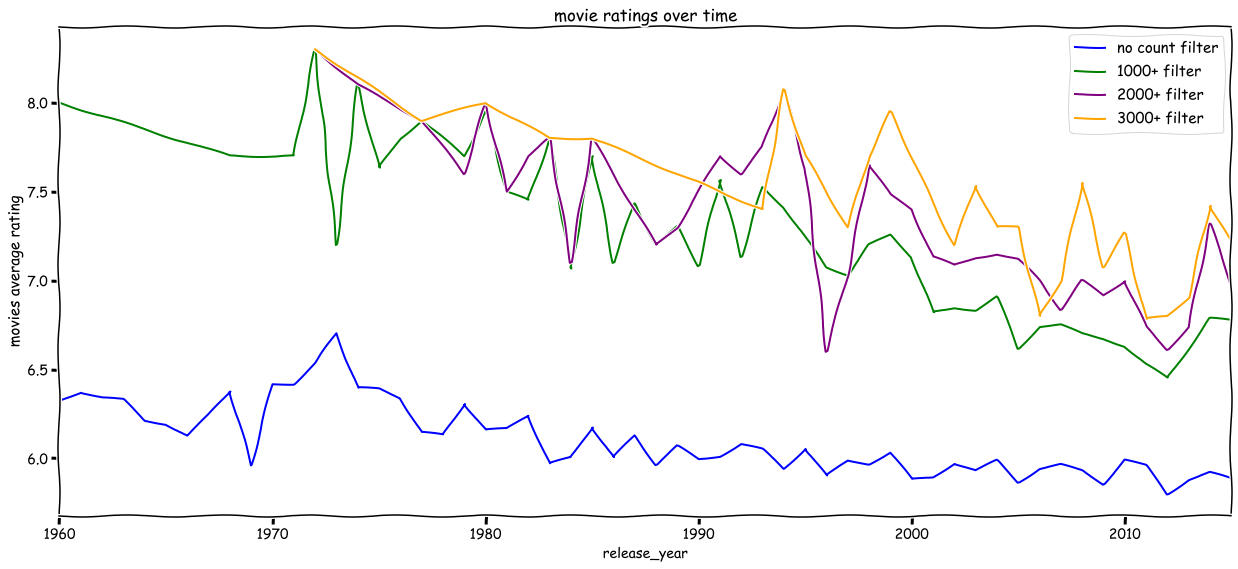

In [46]:
# Plot the vote averages based on vote counts
plt.figure(figsize=(21,9)) #setting figure size
k0 = df.groupby('release_year').mean()['vote_average'].plot(color='blue', label='no count filter')
k1 = df[popularMovies].groupby('release_year').mean()['vote_average'].plot(color='green', label='1000+ filter')
k2 = df[popularMovies_2k].groupby('release_year').mean()['vote_average'].plot(color='purple', label='2000+ filter')
k3 = df[popularMovies_3k].groupby('release_year').mean()['vote_average'].plot(color='orange', label='3000+ filter')
plt.ylabel("movies average rating", fontsize=15)
plt.title("movie ratings over time")
plt.legend(loc='best', fontsize=15)
plt.show();

**the average ratings are influenced by the vote count, generally speaking the movies with higher vote counts are better rated**

<a id='releases'></a>


### Q4: How many movies are released per Year?
- while movie ratings are dropping over the years the pure amount of released movies could be a good indicator

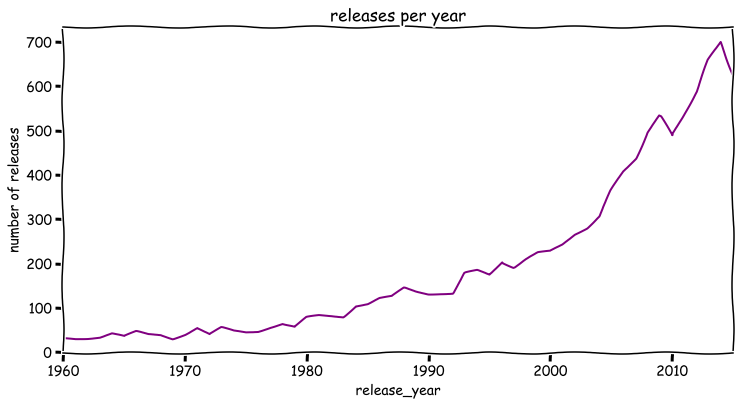

In [47]:
releases = df.groupby('release_year').count()['id']
releases.plot(c='purple',figsize=(12,6))
plt.title('releases per year')
plt.ylabel('number of releases');

**the increased number of movies could be an indicator for the declining average ratings**

<a id='popular'></a>


### Q5: Which are the most popular movies of all time
- let's expand this idea and search for the most popular movies of all time

In [48]:
mostPopularMovie = pd.DataFrame(df['popularity'].sort_values(ascending=False))[:20]
mostPopularMovie['original_title'] = df['original_title'] 
mostPopularMovie['year'] = df['release_year']
mostPopularMovie[:10]

,popularity,original_title,year
0,32.985763,Jurassic World,2015
1,28.419936,Mad Max: Fury Road,2015
629,24.949134,Interstellar,2014
630,14.311205,Guardians of the Galaxy,2014
2,13.112507,Insurgent,2015
631,12.971027,Captain America: The Winter Soldier,2014
1329,12.037933,Star Wars,1977
632,11.422751,John Wick,2014
3,11.173104,Star Wars: The Force Awakens,2015
633,10.739009,The Hunger Games: Mockingjay - Part 1,2014


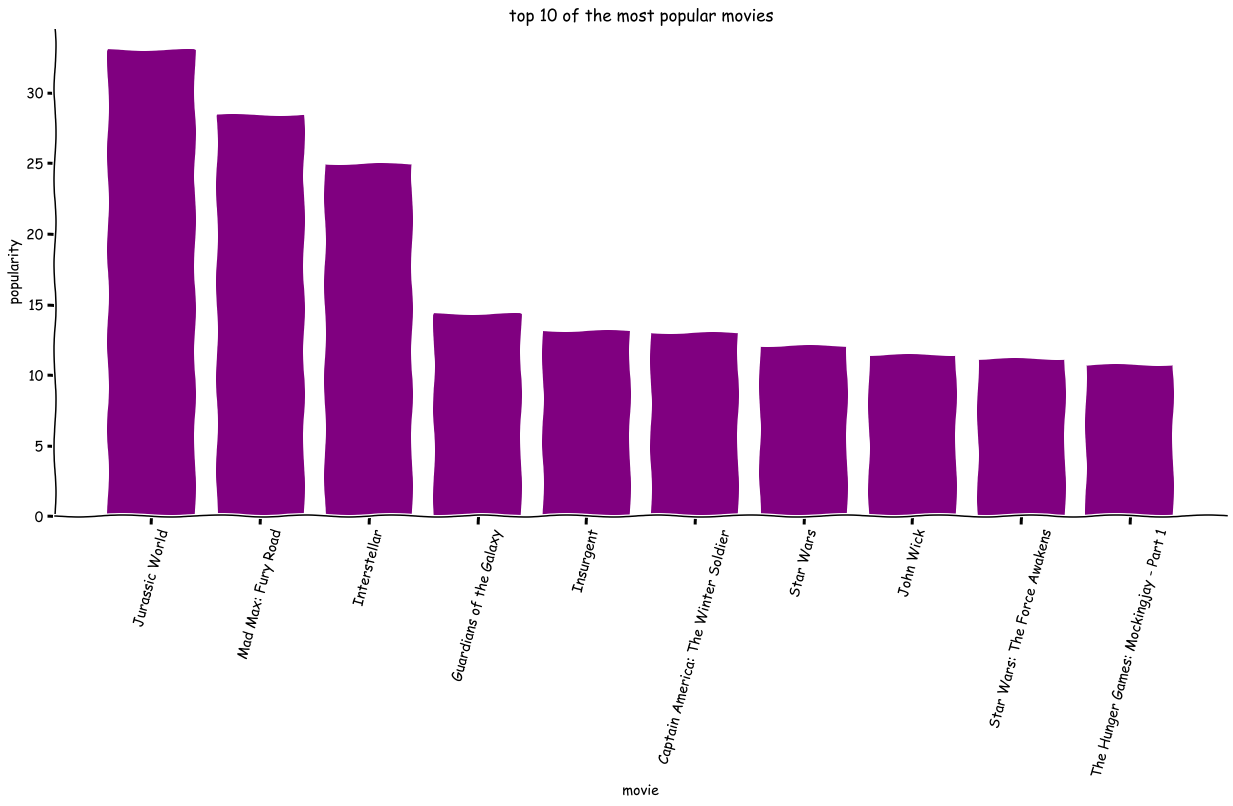

In [49]:
fig = plt.figure(figsize=(21,9))
ax = fig.add_subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.grid(color='blue', linestyle=':', linewidth=.5,alpha=.3)
plt.xticks(rotation=75)

locations = list(np.arange(1,11,1))
heights = list(mostPopularMovie['popularity'][:10])
labels = list(mostPopularMovie['original_title'][:10])

plt.bar(locations, heights, tick_label=labels,color='purple')
plt.title('top 10 of the most popular movies')
plt.xlabel('movie')
plt.ylabel('popularity');

**Star Wars was not the most popular movie, although it's twice in the top 10.**

<a id='popular'></a>


### Q6: Which movies are the most successfull movies of all time in terms of profit

In [50]:
# let's first investigate the movies with the highest revenues
revenues = pd.DataFrame(df['revenue'].sort_values(ascending=False))
revenues['original_title'] = df['original_title']
revenues.head(10)

,revenue,original_title
1386,2781505847,Avatar
3,2068178225,Star Wars: The Force Awakens
5231,1845034188,Titanic
4361,1519557910,The Avengers
0,1513528810,Jurassic World
4,1506249360,Furious 7
14,1405035767,Avengers: Age of Ultron
3374,1327817822,Harry Potter and the Deathly Hallows: Part 2
5422,1274219009,Frozen
5425,1215439994,Iron Man 3


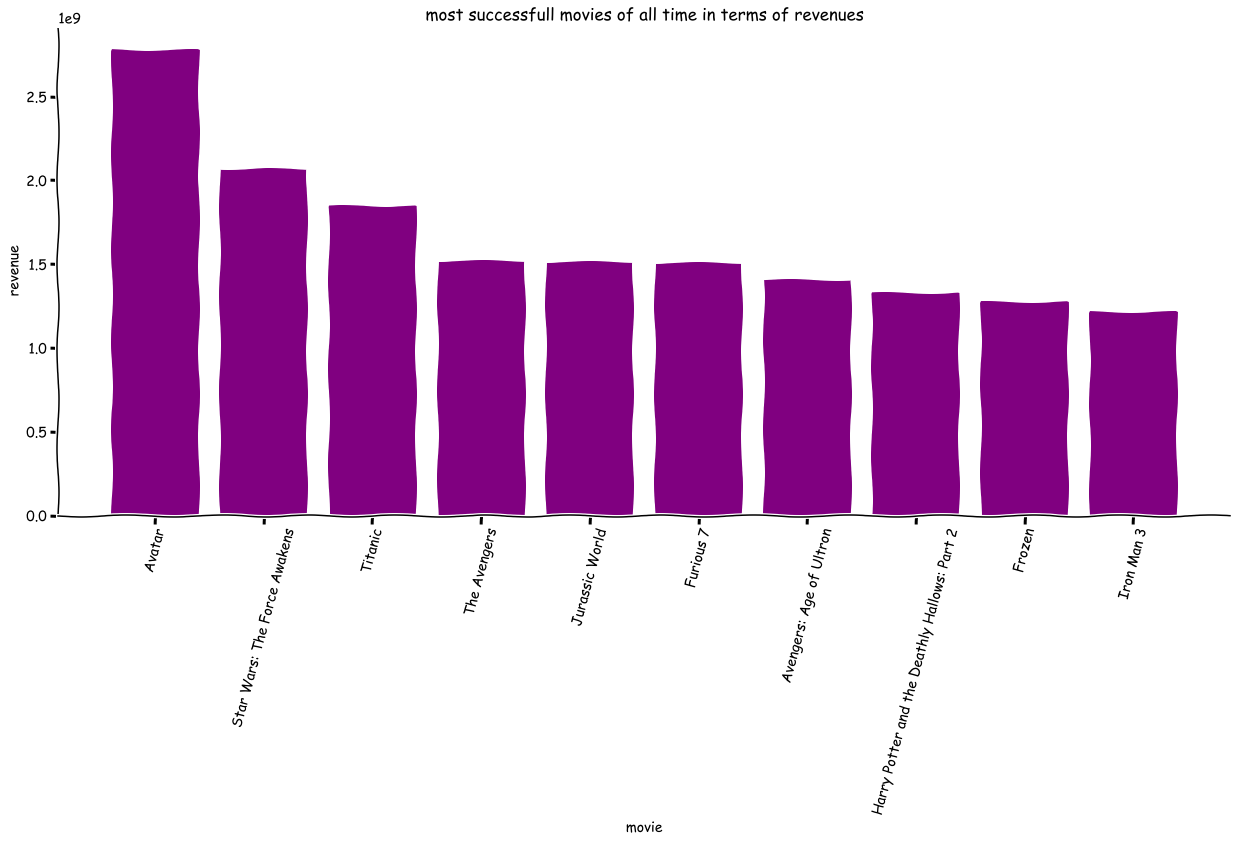

In [51]:
fig = plt.figure(figsize=(21,9))
ax = fig.add_subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.grid(color='blue', linestyle=':', linewidth=.5,alpha=.3)
plt.xticks(rotation=75)

locations = list(np.arange(1,11,1))
heights = list(revenues['revenue'][:10])
labels = list(revenues['original_title'][:10])

plt.bar(locations, heights, tick_label=labels,color='purple')
plt.title('most successfull movies of all time in terms of revenues')
plt.xlabel('movie')
plt.ylabel('revenue');

In [52]:
# let's further investigate the movies with the highest budgets
budgets = pd.DataFrame(df['budget'].sort_values(ascending=False))
budgets['original_title'] = df['original_title']
budgets.head(10)

,budget,original_title
2244,425000000,The Warrior's Way
3375,380000000,Pirates of the Caribbean: On Stranger Tides
7387,300000000,Pirates of the Caribbean: At World's End
14,280000000,Avengers: Age of Ultron
6570,270000000,Superman Returns
4411,260000000,John Carter
1929,260000000,Tangled
7394,258000000,Spider-Man 3
5508,255000000,The Lone Ranger
4363,250000000,The Dark Knight Rises


The Warrior's Way - an unknown movie, at least to me, seems to have wrong values in terms of the budget which seems to be much less ([Wiki](https://en.wikipedia.org/wiki/The_Warrior%27s_Way)).

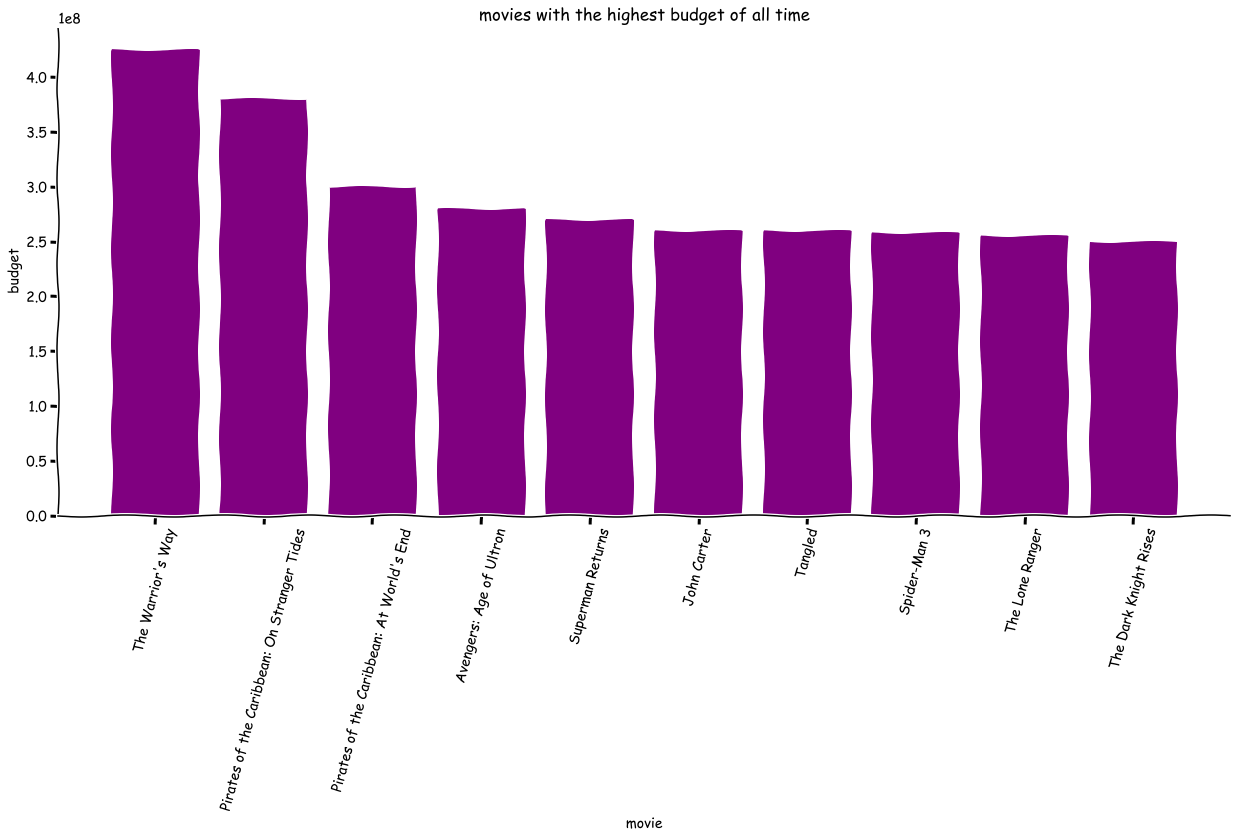

In [53]:
fig = plt.figure(figsize=(21,9))
ax = fig.add_subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.grid(color='blue', linestyle=':', linewidth=.5,alpha=.3)
plt.xticks(rotation=75)

locations = list(np.arange(1,11,1))
heights = list(budgets['budget'][:10])
labels = list(budgets['original_title'][:10])

plt.bar(locations, heights, tick_label=labels,color='purple')
plt.title('movies with the highest budget of all time')
plt.xlabel('movie')
plt.ylabel('budget');

In [54]:
# let's  investigate the movies with the highest profits
profitableMovies = pd.DataFrame(df['profit'].sort_values(ascending=False))
profitableMovies['original_title'] = df['original_title']
profitableMovies.head(10)

,profit,original_title
1386,2544505847,Avatar
3,1868178225,Star Wars: The Force Awakens
5231,1645034188,Titanic
0,1363528810,Jurassic World
4,1316249360,Furious 7
4361,1299557910,The Avengers
3374,1202817822,Harry Potter and the Deathly Hallows: Part 2
14,1125035767,Avengers: Age of Ultron
5422,1124219009,Frozen
8094,1084279658,The Net


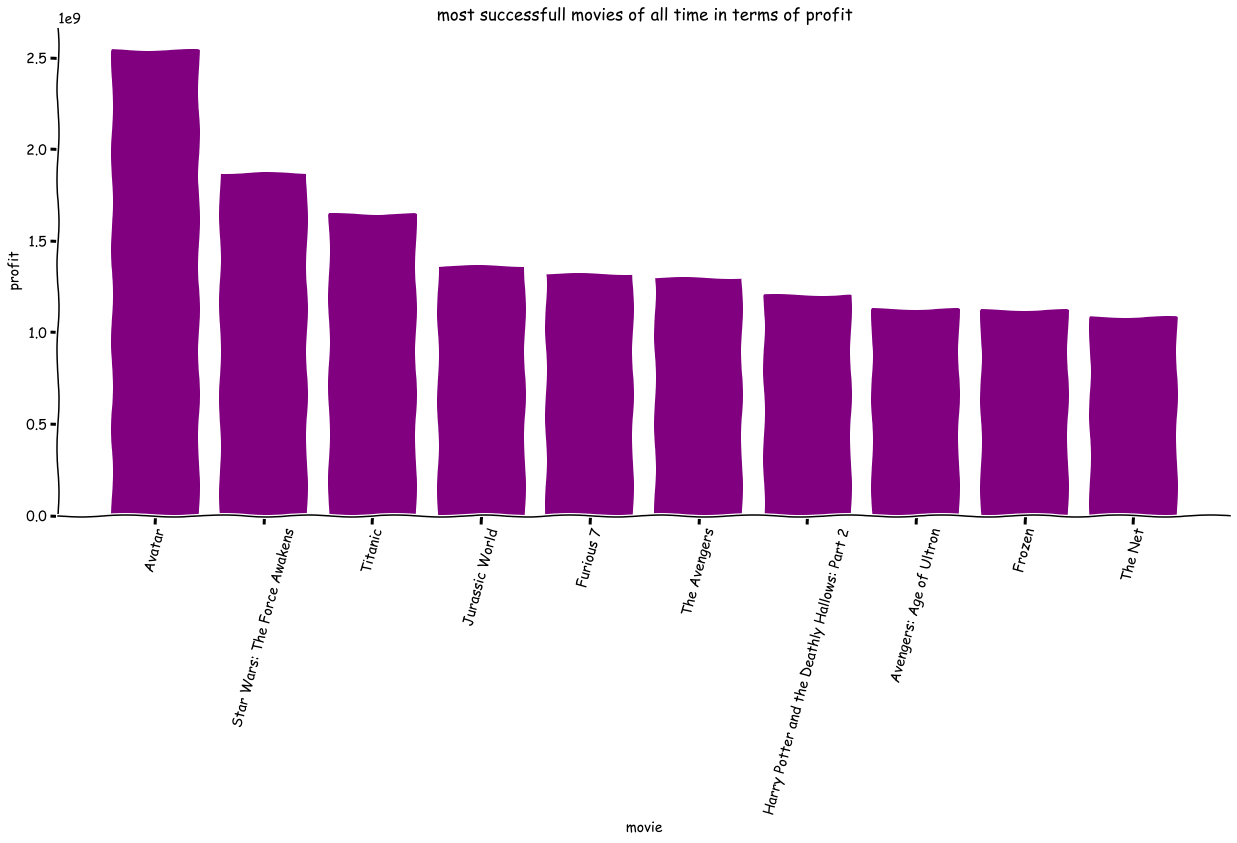

In [55]:
fig = plt.figure(figsize=(21,9))
ax = fig.add_subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.grid(color='blue', linestyle=':', linewidth=.5,alpha=.3)
plt.xticks(rotation=75)

locations = list(np.arange(1,11,1))
heights = list(profitableMovies['profit'][:10])
labels = list(profitableMovies['original_title'][:10])

plt.bar(locations, heights, tick_label=labels,color='purple')
plt.title('most successfull movies of all time in terms of profit')
plt.xlabel('movie')
plt.ylabel('profit');

#### combine the 3 df to a new dataframe containing only the top ten values
- The Warrior's Way will be excluded from the list

In [56]:
top10_monetary = pd.DataFrame(list(revenues.original_title[:10]), columns=['revenue'])
top10_monetary['profit'] = list(profitableMovies.original_title[0:10])
top10_monetary['budget'] = list(budgets.original_title[1:11])
top10_monetary

,revenue,profit,budget
0,Avatar,Avatar,Pirates of the Caribbean: On Stranger Tides
1,Star Wars: The Force Awakens,Star Wars: The Force Awakens,Pirates of the Caribbean: At World's End
2,Titanic,Titanic,Avengers: Age of Ultron
3,The Avengers,Jurassic World,Superman Returns
4,Jurassic World,Furious 7,John Carter
5,Furious 7,The Avengers,Tangled
6,Avengers: Age of Ultron,Harry Potter and the Deathly Hallows: Part 2,Spider-Man 3
7,Harry Potter and the Deathly Hallows: Part 2,Avengers: Age of Ultron,The Lone Ranger
8,Frozen,Frozen,The Dark Knight Rises
9,Iron Man 3,The Net,The Hobbit: An Unexpected Journey


**looking at the top 10 table above, the data shows that the movies high in budget are not the ones that generated the highest profits**


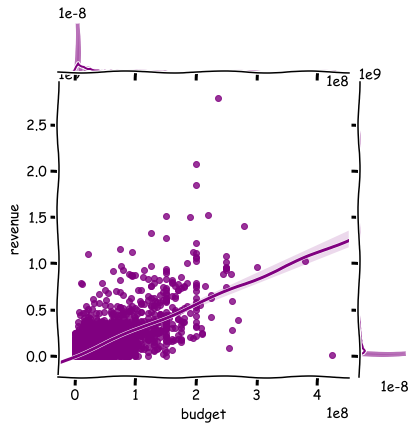

In [57]:
# let's visualize the metrics budget vs revenue
sns.jointplot(x='budget',y='revenue',data=df,kind='reg', color='purple',);

**however, the data shows that on average a higher budget does create higher revenues**

### Research Question 6.1: Which decade was best in terms of profits

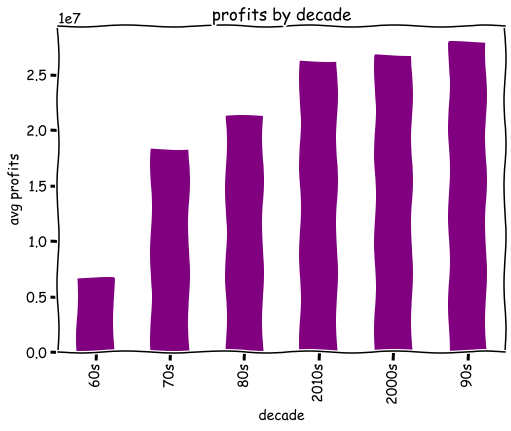

In [58]:
profit_means = df.groupby('decade').mean()['profit']
profit_means.sort_values().plot(kind='bar', color='purple', figsize=(8,6))
plt.title('profits by decade')
plt.ylabel('avg profits');

**looking at the average profits per decade, the 90s have been the most profitable decade so far**

### Research Question 6.2: Do blockbaster movies create higher profits

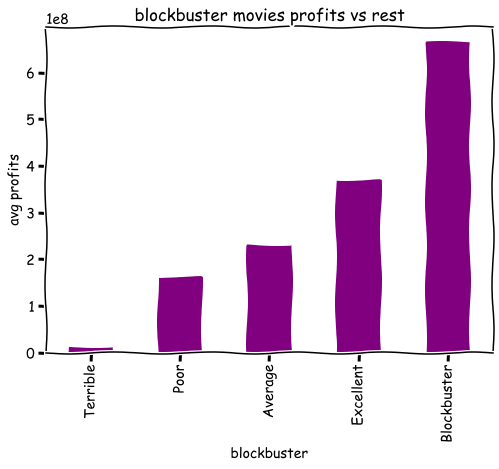

In [59]:
profit_means = df.groupby('blockbuster').mean()['profit']
profit_means.sort_values().plot(kind='bar', color='purple', figsize=(8,6))
plt.title('blockbuster movies profits vs rest')
plt.ylabel('avg profits');

**blockbuster movies indeed aggregate higher profits**

<a id='conclusions'></a>


## Conclusions

> Finally, we have come to the end of this analysis. Looking at the data the number of movie releases have increased over the years. While the average ratings have declined over time, the average popularity have increased. The number of vote counts does have an influence on the metrics and it's a very useful trigger to be considered for data selection. 

> In terms of profits, Blockbuster Movies are clearly generating the highest profits. On average a high budget does generate higher revenues, however the data shows that the highest budgets did not generate the highest profits. 

> The most popular movie found in this dataset was Jurassic World and the movie with the highest revenue and profit was Avatar. Star Wars was the first movie to skyrocket in terms of popularity and it's still one of the most popular movies of all time.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate the Movie Dataset (TMDB) - RZ.ipynb'])

0